# `pyplot` cheat sheet

<br />
&nbsp;

### Required modules

In [7]:
# Main module for plots
import matplotlib.pyplot as plt

# For LaTeX expressions in plots
from matplotlib import rc
rc('text', usetex=True)

# To adjust tick frequency
import matplotlib.ticker as ticker

# For the notebook to save all figures in the .ipynb file
%matplotlib inline

# We will use numpy to compute a few examples
import numpy as np

<br />
&nbsp;

### Figure size and subplots

Figures that will be used in text documents (not slides) should be generated with a specific size. For example, each column in a two-column paper is around 9 cm wide. Hence, if we want to place a figure in one of the columns, a reasonable size would be $(x_\text{cm},y_\text{cm})=(8,5)$ cm.

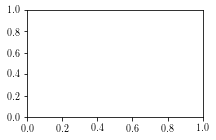

In [13]:
# Figure size in cm
x_cm = 8
y_cm = 5

# Create figure
fig, ax = plt.subplots(figsize=(x_cm/2.54, y_cm/2.54)) 

# Show
plt.show()

<br />
&nbsp;

A single figure can contain $m\times n$ subplots. If $(m,n)\neq(1,1)$, `ax` is a list. To get the axis of subplot $(m,n)$, use `ax[m][n]`.

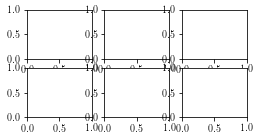

In [99]:
# Figure size in cm
x_cm = 10
y_cm = 5

# Number of subplots
m = 2 # rows
n = 3 # columns

# Create figure
fig, ax = plt.subplots(m, n, figsize=(x_cm/2.54, y_cm/2.54))

# Show
plt.show()

<br />
&nbsp;

For finer tuning of the subplots sizes, use [`GridSpec`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.gridspec.GridSpec.html#matplotlib.gridspec.GridSpec):

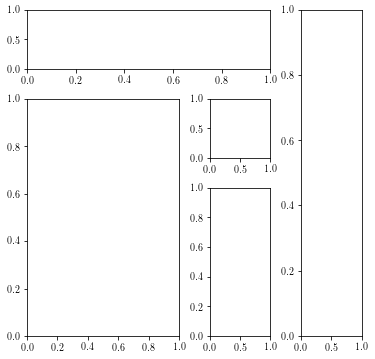

In [113]:
# Create figure
fig = plt.figure(figsize=(6, 6))

# Create subplots grid
grid = fig.add_gridspec(nrows=4, ncols=4, # Number of rows and columns
                        hspace=0.5, wspace=0.5) # Space between subplots

# Define each subplot
ax1 = fig.add_subplot(grid[0, :3])
ax2 = fig.add_subplot(grid[1:, :2])
ax3 = fig.add_subplot(grid[1, 2])
ax4 = fig.add_subplot(grid[2:, 2])
ax5 = fig.add_subplot(grid[:, 3])

<br />
&nbsp;

### Save with high quality

In general, one should save the scientific figures in [vector format](https://en.wikipedia.org/wiki/Vector_graphics). Here we show to save them as a pdf file.

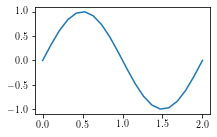

In [87]:
# Data
x = np.linspace(0,2,20)
y = np.sin(x*np.pi)

# Create figure
x_cm = 8
y_cm = 5
fig, ax = plt.subplots(figsize=(x_cm/2.54, y_cm/2.54))

# Plot
plt.plot(x,y)

# Save
filename = 'figs_directory/figname_x%d_y%d.pdf'%(x_cm,y_cm)
plt.savefig(filename, dpi=300, bbox_inches='tight')

<br />
&nbsp;

### Line style

Here we give two examples to showcase the main line style properties.

Note that colors can be [specified in many ways](https://matplotlib.org/stable/tutorials/colors/colors.html), for example using a string from this [list of named colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html "See list of named colors").

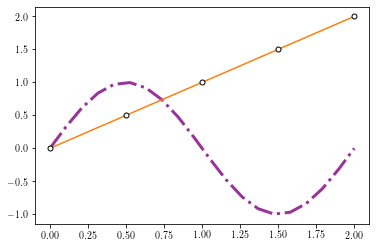

In [61]:
# Data
x = np.linspace(0,2,20)
x2 = np.linspace(0,2,5)
y = np.sin(x*np.pi)

# Create figure
fig, ax = plt.subplots()

# Example 1
plt.plot(x, y, 
         color=(0.5,0,0.5),
         linestyle='-.',
         linewidth=3,
         alpha = 0.8, # transparency (0 = transparent; 1 = opaque)
         marker = '')

# Example 2
plt.plot(x2, x2, 
         color='tab:orange',
         linestyle='-',
         marker = 'o', markersize = 5, 
         markerfacecolor = 'white', 
         markeredgecolor = 'black')

plt.show()

<br />
&nbsp;

### Axes ticks and labels

Most axes properties can be modified through `plt` functions and through axis methods. Here we will show the former for the $x$-axis and the latter for the $y$-axis.

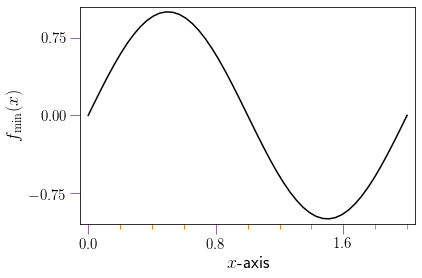

In [293]:
# Data
x = np.linspace(0,2,50)
y = np.sin(x*np.pi)

# Create figure
fig, ax = plt.subplots()

# Plot
plt.plot(x, y, color='black')

# Axes limits
plt.xlim([-0.05,2.05])
ax.set_ylim([-1.05,1.05])

# Axes scales
plt.xscale('linear') # or 'log'
ax.set_yscale('linear') # or 'log'

# Axes labels
plt.xlabel(r'$x$-axis', fontsize=18)
ax.set_ylabel(r'$f_{\min}(x)$', fontsize=18)

# Axes labels position
ax.xaxis.set_label_position('bottom') # 'top' or 'bottom'
ax.yaxis.set_label_position('left') # 'left' or 'right'

# Tick labels
ax.set_xticks([0,0.8,1.6])
ax.set_yticks([-0.75,0,0.75])
ax.ticklabel_format(axis='x',style='plain') # or 'sci'
ax.ticklabel_format(axis='y',style='plain') # or 'sci'
ax.tick_params(labelsize=15)

# Tick frequency
minor_intervals = 4 # Number of minor intervals between two major ticks
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(minor_intervals))

# Tick style
ax.tick_params(which='major', # 'major', 'minor', or 'both'
               width=1, length=10, # size of the ticks
               color='tab:purple') # color of the ticks
ax.tick_params(which='minor', # 'major', 'minor', or 'both'
               width=1, length=5, # size of the ticks
               color='tab:orange') # color of the ticks

plt.show()

<br />
&nbsp;

For personalized labels in the $x$-axis, use the following (similar for $y$-axis):

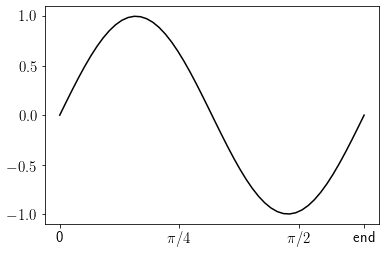

In [301]:
# Data
x = np.linspace(0,2,50)
y = np.sin(x*np.pi)

# Create figure
fig, ax = plt.subplots()

# Plot
plt.plot(x, y, color='black')

# Tick labels
ax.tick_params(labelsize=15)
x_formatter = ticker.FixedFormatter(['0',r'$\pi/4$',r'$\pi/2$','end'])
ax.xaxis.set_major_formatter(x_formatter)

# Tick locations
x_locator = ticker.FixedLocator([0,0.785,1.57,2])
ax.xaxis.set_major_locator(x_locator)

plt.show()

<br />
&nbsp;

Sometimes, minor ticks disappear in a log plot. To fix this, use [the following code](https://stackoverflow.com/questions/44078409/matplotlib-semi-log-plot-minor-tick-marks-are-gone-when-range-is-large "Original source"):

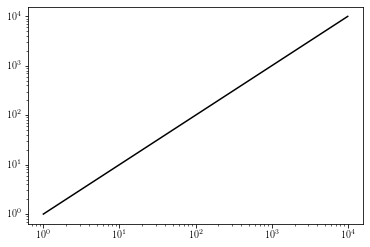

In [289]:
# Data
x = np.linspace(1,10000,50)
y = x

# Create figure
fig, ax = plt.subplots()

# Plot
plt.plot(x, y, color='black')

# Axes scales
ax.set_xscale('log')
ax.set_yscale('log')

# Ensure minor ticks appear
locminx = ticker.LogLocator(base=10.0,
                            subs='all', # Place all ticks
                            numticks=12) # This number should be 12 or larger
ax.xaxis.set_minor_locator(locminx)
ax.xaxis.set_minor_formatter(ticker.NullFormatter()) # No minor labels

locminy = ticker.LogLocator(base=10.0,subs='all',numticks=12)
ax.yaxis.set_minor_locator(locminy)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.show()

<br />
&nbsp;

Note that the tick frequency can be hard to adjust depending on the characteristics of your plot (linear or log, uniform spacing between ticks, etc.). See the [documentation of `plt.ticker`](https://matplotlib.org/3.1.1/api/ticker_api.html) and [these examples](https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html) for further details.

Finally, for further questions about ticks, see [this awesome guide on ticks in `matplotlib`](https://e2eml.school/matplotlib_ticks.html "See awesome guide").

<br />
&nbsp;

### LaTeX expressions

For LaTeX math expressions in labels, legends, or other text in the plot, use `r'$x$'`.

LaTeX command `\text{}` [does not work in `matplotlib`](https://stackoverflow.com/questions/23824687/text-does-not-work-in-a-matplotlib-label "See Stack Overflow discussion") because it requires the amsmath package (not included in `mathtext`, the math rendering engine of `matplotlib`). Instead, use `\mathrm`.

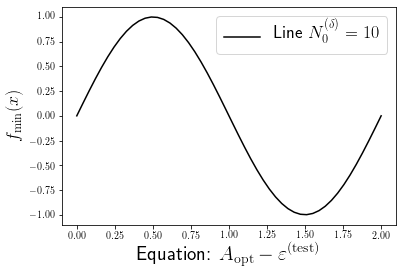

In [72]:
# Remember to import rc and set usetex=True
from matplotlib import rc
rc('text', usetex=True)

# Data
x = np.linspace(0,2,50)
y = np.sin(x*np.pi)

# Create figure
fig, ax = plt.subplots()

# Plot
plt.plot(x, y, color='black', label=r'Line $N_0^{(\delta)}=10$')

# Axes labels
plt.xlabel(r'Equation: $A_\mathrm{opt}-\varepsilon^\mathrm{(test)}$',
           fontsize=20)
plt.ylabel(r'$f_{\min}(x)$', fontsize=18)

# Legend
plt.legend(fontsize=18)

plt.show()

<br />
&nbsp;

### Two different vertical axes

To create a secondary $y$-axis, use `.twinx()` to duplicate the primary axis and then specify the properties of the secondary axis.

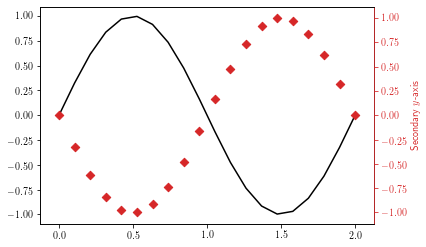

In [81]:
# Data
x = np.linspace(0,2,20)
y = np.sin(x*np.pi)

fig, ax1 = plt.subplots()

# Secondary axis
ax2 = ax1.twinx() # This command duplicates the axes

# Plot
ax1.plot(x, y, color='black')
ax2.scatter(x, -y, marker='D', color='tab:red')

# Secondary axis properties
ax2.set_ylabel(r'Secondary $y$-axis', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.spines['right'].set_color('tab:red')
ax2.tick_params(axis='y', which='both', colors='tab:red')

plt.show()

<br />
&nbsp;

### Colors from a colormap

A general rule of thumb when plotting several lines in a single plot is to ensure that all lines are easily distinguishable by color-blind people (see [here](https://towardsdatascience.com/two-simple-steps-to-create-colorblind-friendly-data-visualizations-2ed781a167ec) an example of the effect of different color blindness). For that, one can employ ($i$) different symbols or line styles and ($ii$) colors that remain easily distinguishable to any eye (color-blind or not).

The same considerations apply to other types of plots (colormaps, bars, pie charts, etc.).

When data follows a progressive trend (e.g., four lines are plotted, each for a different value of a parameter $\theta$), a possible approach is to employ colors from a (perceptually uniform sequential) [colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html "See all colormaps").

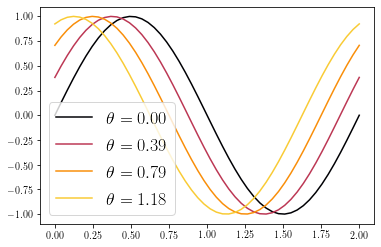

In [86]:
x = np.linspace(0,2,50)
y = [x]*4
theta = [x]*4
for i in range(0,len(y)):
    theta[i] = i*np.pi/8
    y[i] = np.sin(x*np.pi+theta[i])

# Get colors from colormap
cmap = plt.cm.get_cmap('inferno')
colors = [cmap(0),cmap(0.5),cmap(0.75),cmap(0.875)]

# Plot
fig, ax = plt.subplots()
for i in range(0,len(y)):
    plt.plot(x, y[i], color=colors[i], label=r'$\theta = %.2f$'%theta[i])

# Legend
plt.legend(fontsize=18)

plt.show()

<br />
&nbsp;

### Error bars

In [ ]:
            axes[0].errorbar(x, y, yerr=err, linewidth=0, marker='o', color='k', markersize=2,
                             elinewidth=1, capsize=3, capthick=1, label='Learner data', alpha=0.5)

<br />
&nbsp;
<br />
&nbsp;

## Full example

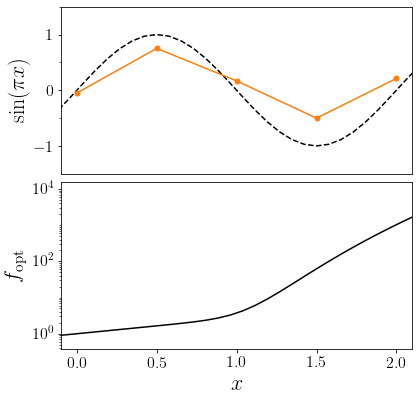

In [291]:
# Data
x = np.linspace(-0.5,2.5,40)
y = np.sin(x*np.pi)
y2 = np.exp(x)+x**10
x_exp = np.linspace(0,2,5)
y_exp = np.sin(x_exp*np.pi)+np.random.rand(len(x_exp))-0.5

# Create figure with size in cm
x_cm = 16
y_cm = 16
fig = plt.figure(figsize=(x_cm/2.54, y_cm/2.54))
grid = fig.add_gridspec(nrows=2, ncols=1, hspace=0.05)
ax = [None] * 2
ax[0] = fig.add_subplot(grid[0, 0])
ax[1] = fig.add_subplot(grid[1, 0])

# Plot
ax[0].plot(x, y, 
         color='black',
         linestyle='--',
         label='Theory')
ax[0].plot(x_exp, y_exp, 
         color='tab:orange',
         marker='o', markersize = 5, 
         markerfacecolor='tab:orange', 
         markeredgecolor='tab:orange',
         label='Experiment')
ax[1].plot(x, y2, color='black')

# Axes limits
ax[0].set_xlim([-0.1,2.1])
ax[1].set_xlim([-0.1,2.1])
ax[0].set_ylim([-1.5,1.5])

# Axes scale
ax[1].set_yscale('log')

# Axes labels
ax[0].set_ylabel(r'$\sin(\pi x)$', fontsize=22)
ax[1].set_xlabel(r'$x$', fontsize=22)
ax[1].set_ylabel(r'$f_{\mathrm{opt}}$', fontsize=22)

# Axes ticks and tick labels
ax[0].set_xticks([])
ax[0].set_yticks([-1,0,1])
ax[0].yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax[0].tick_params(labelsize=16)
ax[1].set_yticks([1,100,10000])
ax[1].tick_params(labelsize=16)
locmin = ticker.LogLocator(base=10.0, subs='all', numticks=12)
ax[1].yaxis.set_minor_locator(locmin)
ax[1].yaxis.set_minor_formatter(ticker.NullFormatter())

# Show or save
save = False
if save:
    filename = 'figs_directory/example_fig'
    plt.savefig(filename,dpi=300,bbox_inches='tight')
else:
    plt.show()

<br />
&nbsp;
<br />
&nbsp;
<br />
&nbsp;
<br />
&nbsp;

<span style="color:blue">Álvaro Gómez Iñesta - Wehner's Group @ QuTech, TU Delft. February 2021.</span>